# 1. Import data and libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import dataframes

In [2]:
# Defining the path
path = r'C:\Users\Admin\2nd-OCT-2023 Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\Admin\\2nd-OCT-2023 Instacart Basket Analysis'

In [4]:
#import dataframe as ords_prods_merge
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged_updated_aggregated.pkl'))

In [5]:
# Check columns in dataframe
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_orde,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


### Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

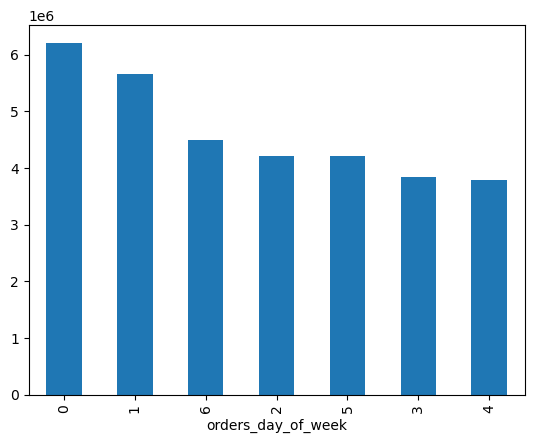

In [6]:
# create bar chart for orders_day_of_week column
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

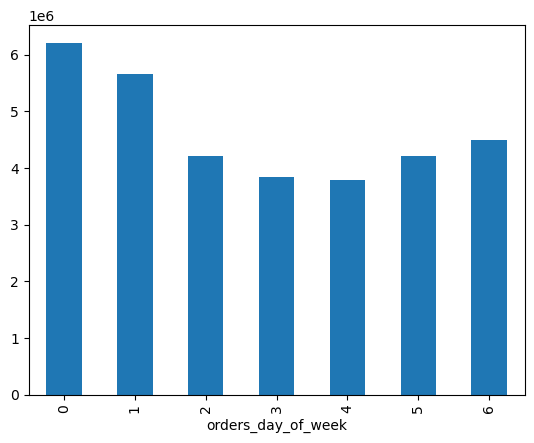

In [8]:
# Sort bar chart according to index order
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

### Exporting Charts

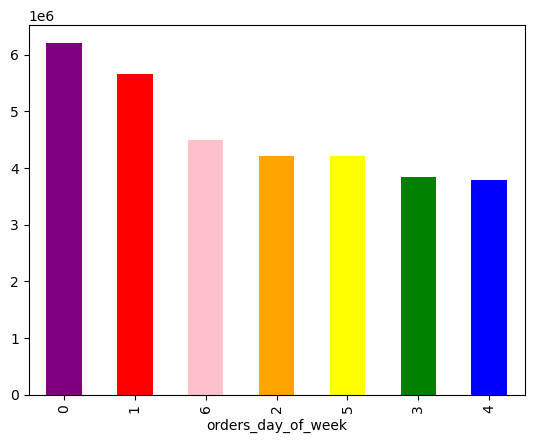

In [9]:
# Save the bar chart with the bar object
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [10]:
# Export the chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Creating Histograms and Scatterplots

#### Histograms

<Axes: ylabel='Frequency'>

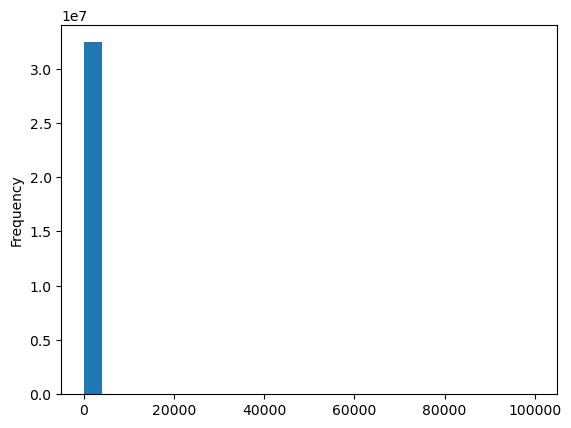

In [11]:
# Create a histogram of the 'prices' column
ords_prods_merge['prices'].plot.hist(bins = 25)

In [13]:
# Run data integrity checks
ords_prods_merge['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [14]:
ords_prods_merge['prices'].mean()

11.98114392296625

In [15]:
ords_prods_merge['prices'].median()

7.4

In [16]:
ords_prods_merge['prices'].max()

99999.0

The max price of 99999 seems to be an outlier

### Scatterplots

<Axes: xlabel='prices', ylabel='prices'>

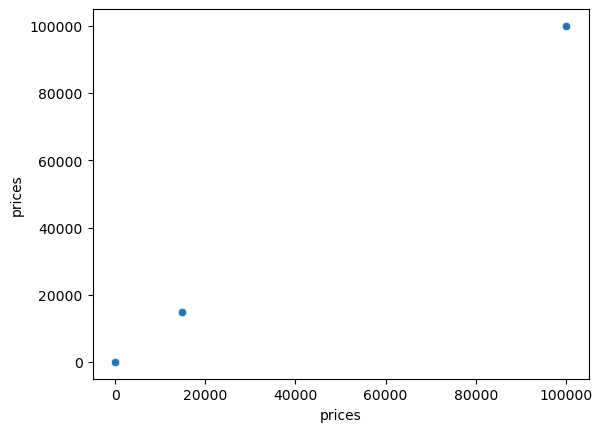

In [17]:
# Create a scatterplot for the prices column (plotting the prices column against itself)
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [18]:
# Check for outlier above max price of 100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_orde,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29193268,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29193269,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29193270,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29193271,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [19]:
# Mark outlier values as missing (NaN)
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [20]:
# Check column
ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

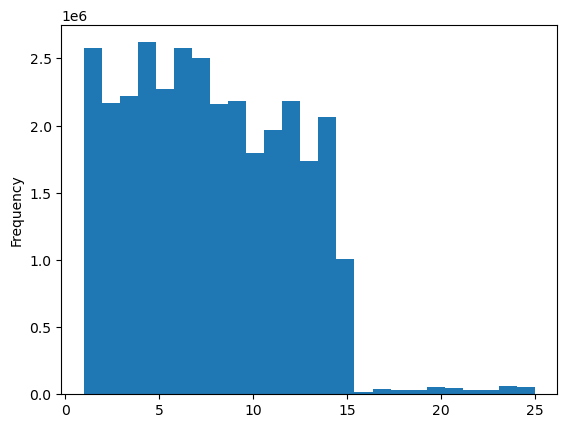

In [21]:
# Try creating a histogram of the 'prices' column again
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

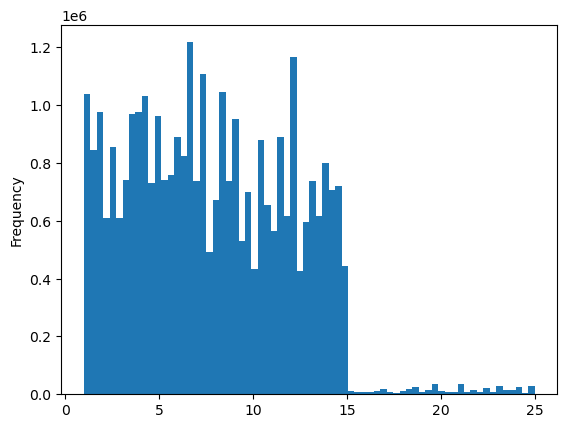

In [22]:
# Increase the level of bins to 70 to increase the granularity  
ords_prods_merge['prices'].plot.hist(bins = 70)

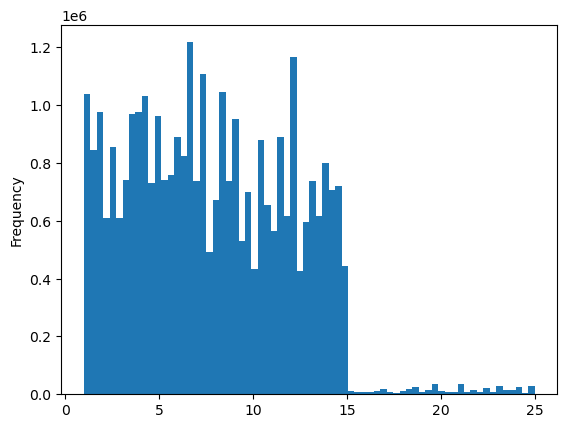

In [25]:
# Save the histogram with the hist object
Hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [27]:
# Export the chart
Hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices.png'))

### Creating line charts

#### Sampling data

In [29]:
# Set the seed
np.random.seed(4)

In [30]:
# Create a list holding True/False values of the test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [31]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [32]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [34]:
# Check dataframe
len(ords_prods_merge)

32434212

In [35]:
# Check that susbsets match dataframe
len(big) + len(small)

32434212

In [36]:
# reduce samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.”
df_2 = small[['orders_day_of_week','prices']]

In [37]:
# Check columns
df_2

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0
...,...,...
32434188,3,9.9
32434191,1,2.6
32434199,4,3.7
32434204,0,3.7


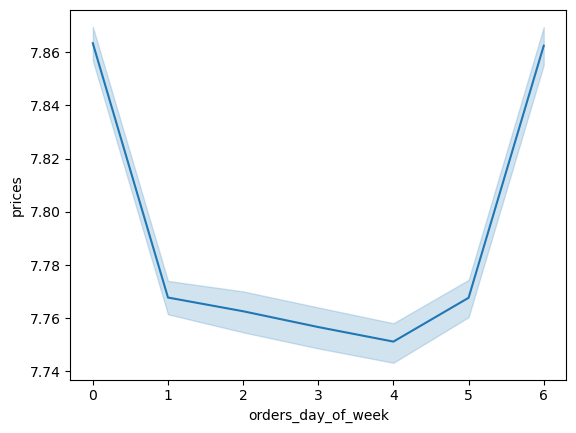

In [38]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [39]:
# Export line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart.png'))